In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('LINKED_Public.csv')
data.head(5)

,PLSAM,PERTYPE,ORIG_HOME,HHSIZE,DEST_HOME,DTYPE,TOUR_PURP,DOW,HTAZ,OTAZ,...,TRPDUR,ACTDUR,TRPDIST_HN,HNYC,WORK_PURP,HHSIZ_R,INCOM_R,PMODE_R,WHT_FAC3,Mode
0,30000560102,2,1,6,0,1.0,9,3,2626,2626,...,7,59,2.81,0,2,4,3,1,2136.008377,Auto
1,30000560103,2,0,6,1,3.0,9,3,2626,2627,...,7,235,2.81,0,2,4,3,1,2136.008377,Auto
2,30000560104,2,1,6,0,1.0,1,3,2626,2626,...,8,152,2.81,0,1,4,3,1,1352.636918,Auto
3,30000560105,2,0,6,1,3.0,1,3,2626,2627,...,7,176,2.81,0,1,4,3,1,1352.636918,Auto
4,30000560106,2,1,6,0,1.0,9,3,2626,2626,...,9,36,3.47,0,2,4,3,1,2081.238932,Auto


In [4]:
data = data[data['OTAZ']<1623]
data = data[data['DTAZ']<1623]
data=data[data.PMODE_R != 97]
data=data.reset_index()
len(data)

34336

In [5]:
X=data.iloc[:,2:-3]
X.head()

,PERTYPE,ORIG_HOME,HHSIZE,DEST_HOME,DTYPE,TOUR_PURP,DOW,HTAZ,OTAZ,DTAZ,...,DTPURP_AGG,TRP_DEP_HR,TRP_ARR_HR,TRPDUR,ACTDUR,TRPDIST_HN,HNYC,WORK_PURP,HHSIZ_R,INCOM_R
0,5,1,1,0,1.0,5,4,377,377,425,...,5,7,7,20,460,2.39,1,2,1,1
1,5,0,1,1,3.0,5,4,377,425,377,...,0,15,15,20,699,2.38,1,2,1,1
2,5,0,2,0,1.0,1,1,2687,1393,1479,...,1,7,8,45,225,6.04,0,1,2,4
3,5,0,2,0,3.0,5,1,2687,1393,1393,...,0,14,14,5,764,0.70,0,2,2,4
4,5,0,1,0,3.0,5,5,3188,99,100,...,7,16,16,3,165,0.13,0,2,1,1


In [6]:
list(X.columns) 

['PERTYPE',
 'ORIG_HOME',
 'HHSIZE',
 'DEST_HOME',
 'DTYPE',
 'TOUR_PURP',
 'DOW',
 'HTAZ',
 'OTAZ',
 'DTAZ',
 'OTPURP_AGG',
 'DTPURP_AGG',
 'TRP_DEP_HR',
 'TRP_ARR_HR',
 'TRPDUR',
 'ACTDUR',
 'TRPDIST_HN',
 'HNYC',
 'WORK_PURP',
 'HHSIZ_R',
 'INCOM_R']

In [7]:
X=preprocessing.normalize(X)

In [8]:
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10]
for n_clusters in range_n_clusters: #try different numbers of clusters
    kmeans = KMeans(n_clusters=n_clusters,random_state=324).fit(X,sample_weight=data.iloc[:,-2])
    cluster_labels = kmeans.fit_predict(X,sample_weight=data.iloc[:,-2])
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.456153912142133
For n_clusters =3, the average silhouette_score is :0.4940448558946166
For n_clusters =4, the average silhouette_score is :0.4004446685445348
For n_clusters =5, the average silhouette_score is :0.4511086245384528
For n_clusters =6, the average silhouette_score is :0.48333179217931316
For n_clusters =7, the average silhouette_score is :0.4533330386597473
For n_clusters =8, the average silhouette_score is :0.4646904114559982
For n_clusters =9, the average silhouette_score is :0.436030882883508
For n_clusters =10, the average silhouette_score is :0.446931567879245


In [9]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow(data,K,weight):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data,sample_weight=weight) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

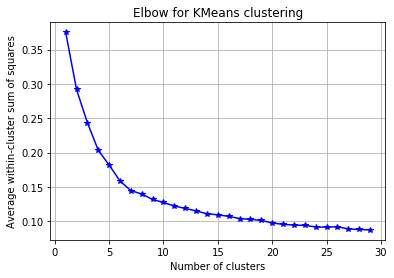

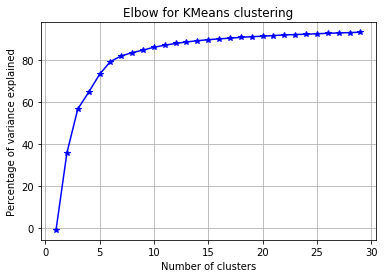

In [10]:
elbow(X, range(1,30),data.iloc[:,-2])

In [11]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

kmeans = KMeans(n_clusters=6,random_state=324).fit(X,sample_weight=data.iloc[:,-2])
cluster_labels = kmeans.fit_predict(X,sample_weight=data.iloc[:,-2])
res=kmeans.predict(X,sample_weight=data.iloc[:,-2])
res=pd.concat((data,pd.Series(res)),axis=1)
res=res.rename({0:"cluster"},axis='columns')
res.head()

,index,PLSAM,PERTYPE,ORIG_HOME,HHSIZE,DEST_HOME,DTYPE,TOUR_PURP,DOW,HTAZ,...,ACTDUR,TRPDIST_HN,HNYC,WORK_PURP,HHSIZ_R,INCOM_R,PMODE_R,WHT_FAC3,Mode,cluster
0,51,30004030102,5,1,1,0,1.0,5,4,377,...,460,2.39,1,2,1,1,1,449.796522,Auto,4
1,52,30004030103,5,0,1,1,3.0,5,4,377,...,699,2.38,1,2,1,1,1,449.796522,Auto,1
2,142,30006880102,5,0,2,0,1.0,1,1,2687,...,225,6.04,0,1,2,4,2,2169.308974,Rail or Ferry,5
3,145,30006880109,5,0,2,0,3.0,5,1,2687,...,764,0.70,0,2,2,4,1,1238.527147,Auto,4
4,153,30007110103,5,0,1,0,3.0,5,5,3188,...,165,0.13,0,2,1,1,1,206.401282,Auto,2


In [12]:
TripClusterUpper = res.groupby(['cluster']).agg({'cluster': 'count'})
TripClusterUpper

,cluster
cluster,
0,2742
1,4209
2,3019
3,2817
4,7043
5,14506


In [13]:
TripCluster = res.groupby([ 'Mode']).agg({'cluster': 'count'})
reference=TripCluster.div(len(data), level='cluster')*100
reference

,cluster
Mode,
Auto,29.919035
Bus,10.493360
Rail or Ferry,20.855662
Shared Ride or Taxi,2.428938
Walk or Non-Motorized,36.303006


In [14]:
TripCluster = res.groupby(['cluster', 'Mode']).agg({'cluster': 'count'})
summary=TripCluster.div(TripClusterUpper, level='cluster')*100
summary

cluster
cluster Mode                            
0       Auto                   18.417214
        Bus                    10.977389
        Rail or Ferry          63.056163
        Shared Ride or Taxi     3.355215
        Walk or Non-Motorized   4.194019
1       Auto                    7.935377
        Bus                    10.810169
        Rail or Ferry          33.095747
        Shared Ride or Taxi     4.419102
        Walk or Non-Motorized  43.739606
2       Auto                   15.170586
        Bus                     2.848625
        Rail or Ferry          14.309374
        Shared Ride or Taxi     2.285525
        Walk or Non-Motorized  65.385889
3       Auto                   17.003905
        Bus                    11.643592
        Rail or Ferry          64.252751
        Shared Ride or Taxi     2.342918
        Walk or Non-Motorized   4.756834
4       Auto                   31.946614
        Bus                    16.484453
        Rail or Ferry          12.565668
        Shared Ride or Taxi     2.697714
        Walk or Non-Motorized  36.305552
5       Auto                   43.064939
        Bus                     8.768785
        Rail or Ferry           6.287054
        Shared Ride or Taxi     1.592445
        Walk or Non-Motorized  40.286778

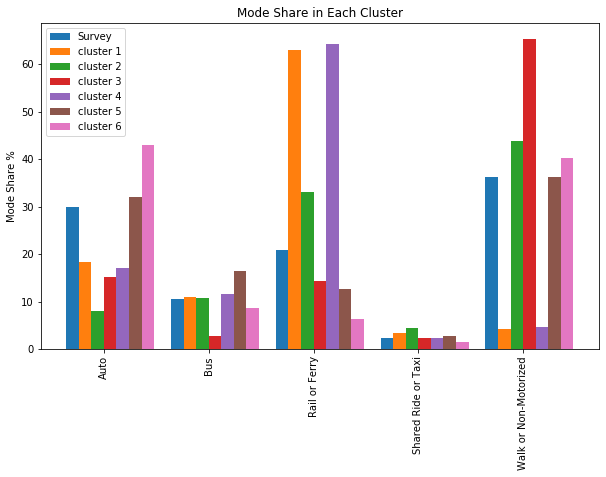

In [15]:
width = 0.12    
ind = np.arange(5)
plt.figure(figsize=(10,6))
# Plotting

plt.bar(ind, reference['cluster'], width, label='Survey')
plt.bar(ind + width*1, summary.cluster[0] , width, label='cluster 1')
plt.bar(ind + width*2, summary.cluster[1], width, label='cluster 2')
plt.bar(ind + width*3, summary.cluster[2], width, label='cluster 3')
plt.bar(ind + width*4, summary.cluster[3], width, label='cluster 4')
plt.bar(ind + width*5, summary.cluster[4], width, label='cluster 5')
plt.bar(ind + width*6, summary.cluster[5], width, label='cluster 6')

plt.ylabel('Mode Share %')
plt.title('Mode Share in Each Cluster')
plt.xticks(ind + width*2.5, ['Auto', 'Bus', 'Rail or Ferry','Shared Ride or Taxi','Walk or Non-Motorized'],rotation=90)
plt.legend(loc='best')
plt.show()

In [16]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [17]:
discovery=res[res['cluster']==3]
discovery

,index,PLSAM,PERTYPE,ORIG_HOME,HHSIZE,DEST_HOME,DTYPE,TOUR_PURP,DOW,HTAZ,...,ACTDUR,TRPDIST_HN,HNYC,WORK_PURP,HHSIZ_R,INCOM_R,PMODE_R,WHT_FAC3,Mode,cluster
7,173,30007490202,1,1,2,0,1.0,1,4,1607,...,495,16.39,1,1,2,4,2,206.128265,Rail or Ferry,3
18,303,30011900103,5,0,1,0,2.1,5,5,1082,...,30,7.57,1,2,1,1,2,309.066991,Rail or Ferry,3
22,319,30012930102,1,1,2,0,1.0,1,4,1082,...,440,0.00,1,1,2,4,2,47.755525,Rail or Ferry,3
57,506,30021670106,1,0,1,1,3.0,1,4,53,...,544,17.88,1,1,1,1,1,449.902147,Auto,3
63,555,30024970102,4,1,2,0,1.0,9,4,185,...,185,3.55,1,2,2,4,2,1931.029868,Rail or Ferry,3
67,559,30024970202,1,1,2,0,2.1,1,4,185,...,70,1.36,1,1,2,4,4,1446.102013,Shared Ride or Taxi,3
80,674,30030430102,2,1,1,0,1.0,1,4,828,...,730,7.75,1,1,1,1,2,140.180952,Rail or Ferry,3
99,794,30033940105,1,0,1,0,11.0,1,3,23,...,100,0.00,1,1,1,3,1,414.006005,Auto,3
135,936,30038350102,1,1,3,0,1.0,1,4,1295,...,544,0.00,1,1,3,4,3,627.375551,Bus,3
139,940,30038350202,1,1,3,0,1.0,1,4,1295,...,480,9.05,1,1,3,4,3,358.900836,Bus,3


In [18]:
TripCluster = res.groupby(['OTAZ']).agg({'cluster': 'count'})
TripCluster

,cluster
OTAZ,
1,11
2,63
3,3
4,148
5,66
6,55
7,54
8,29
9,67


In [19]:
import geopandas

In [20]:
TAZ = geopandas.read_file('BPM_TAZ2010.shp')
TAZ=TAZ.merge(TripCluster, left_on='TAZ_ID1', right_on='OTAZ')
TAZ

,ID,AREA,AREA1,TAZ_ID1,BPZ3_ID,REGION,COUNTYCODE,y,x,geometry,cluster
0,1009,0.196601,0.196601,1009,3257,1,3,40.887210,-73.814530,"POLYGON ((-73.8236 40.89089999999999, -73.8235...",8
1,903,0.551513,0.551513,903,3151,1,3,40.904799,-73.910842,"POLYGON ((-73.921145 40.887094, -73.9207009999...",70
2,901,0.100066,0.100066,901,3149,1,3,40.909690,-73.900352,"POLYGON ((-73.9041 40.9083, -73.9036 40.9099, ...",12
3,902,0.194815,0.194815,902,3150,1,3,40.904357,-73.901150,POLYGON ((-73.90649999999999 40.90159999999999...,41
4,900,0.169347,0.169347,900,3148,1,3,40.897340,-73.905773,"POLYGON ((-73.9084 40.8993, -73.90729999999999...",4
5,904,0.412842,0.412842,904,3152,1,3,40.893046,-73.913570,"POLYGON ((-73.9192 40.8867, -73.91849999999999...",71
6,1011,0.275568,0.275568,1011,3259,1,3,40.891368,-73.844876,"POLYGON ((-73.8389 40.8939, -73.8378 40.8936, ...",17
7,1018,0.061400,0.061400,1018,3266,1,3,40.895235,-73.841768,"POLYGON ((-73.84 40.8977, -73.8402 40.897, -73...",9
8,1006,0.265705,0.265705,1006,3254,1,3,40.885981,-73.835258,"POLYGON ((-73.8424 40.8882, -73.8425 40.8884, ...",18
9,1007,0.201954,0.201954,1007,3255,1,3,40.883778,-73.844261,"POLYGON ((-73.8475 40.8875, -73.8459 40.8877, ...",9


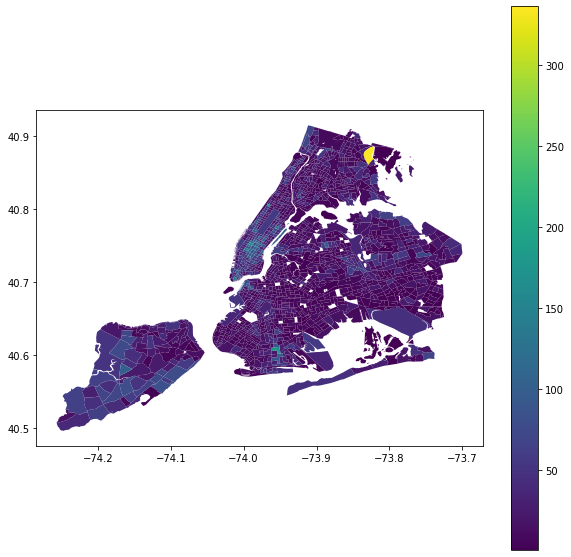

In [21]:
#fig, ax = plt.subplots(1, 1)
TAZ.plot(column='cluster',figsize=(10,10),edgecolor=None,legend=True)

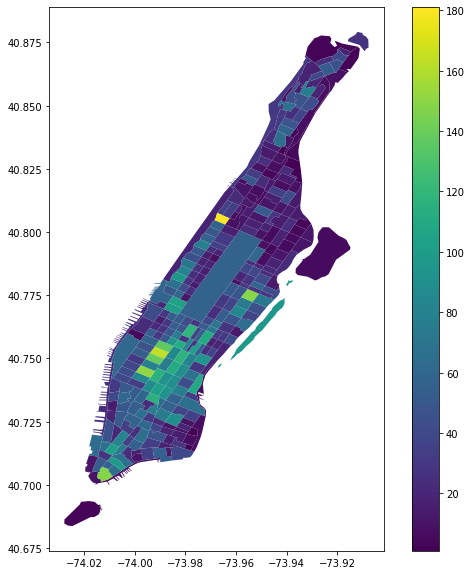

In [22]:
Man=TAZ[TAZ['TAZ_ID1']<=318]
Man.plot(column='cluster',figsize=(10,10),legend=True)